In [18]:
from osgeo import gdal
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio

In [19]:
#Raster location
path = "../rasters/raster_2002.tif"

src_ds = gdal.Open(path)

print("[ RASTER BAND COUNT ]: ", src_ds.RasterCount)


[ RASTER BAND COUNT ]:  1


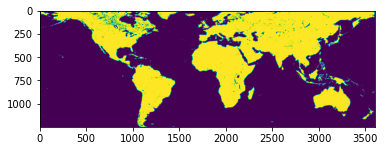

In [20]:
band = src_ds.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [21]:
stats = band.GetStatistics( True, True )

print ("[ STATS ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % ( \
        stats[0], stats[1], stats[2], stats[3] ))

[ STATS ] =  Minimum=1.400, Maximum=155.300, Mean=18.039, StdDev=17.721


In [22]:
#get no nan values
noDataValue = band.GetNoDataValue()

In [23]:
rast_array = np.array(src_ds.GetRasterBand(1).ReadAsArray())
print(rast_array)

[[-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 ...
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]]


In [24]:
raster_shape = rast_array.shape

In [25]:
src_ds.GetGeoTransform()

(-180.0, 0.1, 0.0, 70.0, 0.0, -0.1)

In [13]:
# GDAL affine transform parameters, According to gdal documentation xoff/yoff are image left corner, a/e are pixel wight/height and b/d is rotation and is zero if image is north up. 
xoff, a, b, yoff, d, e = src_ds.GetGeoTransform()

def pixel2coord(x, y):
   """Returns global (lat, long) coordinates from pixel x, y coords"""
   xp = a * x + b * y + a * 0.5 + b * 0.5 + xoff
   yp = d * x + e * y + d * 0.5 + e * 0.5 + yoff
   return(xp, yp)

In [14]:
raster_shape

(1250, 3600)

In [33]:
dicts = []


for row in  range(0, raster_shape[0]):
    for col in  range(0, raster_shape[1]): 
        pollution = rast_array[row,col]
        if pollution != noDataValue:
            lat, long = pixel2coord(col, row)
            dicts.append({"lon":long, "lat":lat, "value":pollution})



        


'\nwith rasterio.open(path) as map_layer:\n    for row in  range(0, raster_shape[0]):\n        for col in  range(0, raster_shape[1]): \n            pollution = rast_array[row,col]\n            if pollution != noDataValue:\n                lat, long = map_layer.xy(row, col)\n                dicts.append({"lat":lat, "lon":long, "value":pollution})\n\n'

In [34]:
pd.DataFrame(dicts)

,lon,lat,value
0,69.35,-163.05,2.7
1,69.35,-162.95,2.7
2,69.35,-162.85,2.7
3,69.35,-162.75,2.7
4,69.35,-162.65,2.7
...,...,...,...
1377500,-54.95,-65.95,1.9
1377501,-54.95,-65.65,1.9
1377502,-54.95,-65.55,2.0
1377503,-54.95,-65.45,2.0
